# BANGLADESH USED CAR PRICE PREDICTION

In [1]:
# Assigning Dataset Path

dt = 'Car.csv'  ## Place your Dataset Path Here

## Importing packages

In [2]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.neighbors import KNeighborsRegressor #K-Neighrest Neighbor
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#pip install -U scikit-learn==1.3.1


In [4]:
d1 = pd.read_csv(dt,encoding='latin-1') # Here dt is a data frame

In [5]:
# The first 15 data of the dataset
d1.head(15)

,car_name,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Maruti Suzuki WagonR VXI 2004,Maruti Suzuki,WagonR,2006,2004,Manual,Saloon,"CNG, Octane",1061,73000,249400.0
1,Toyota Starlet Soleil 1992,Toyota,Starlet,1995,1992,Automatic,Hatchback,"Petrol, CNG",1300,135773,406000.0
2,Nissan Bluebird sylphy 2006,Nissan,Bluebird,2010,2006,Automatic,Saloon,Octane,1500,76000,1180000.0
3,Toyota RunX 2005,Toyota,RunX,2007,2005,Automatic,Hatchback,"Petrol, CNG, Octane",1500,142000,1038200.0
4,Toyota Allion A15 2017,Toyota,Allion,2020,2017,Automatic,Saloon,"Petrol, Octane",1500,20000,3120400.0
5,Hyundai Tucson 2011,Hyundai,Tucson,2014,2011,Automatic,SUV / 4x4,"Petrol, Octane",2000,29698,1740000.0
6,Toyota Esquire 2016,Toyota,Esquire,2018,2016,Automatic,MPV,Octane,1800,45214,3306000.0
7,Toyota Corolla 2000,Toyota,Corolla,2001,2000,Automatic,Saloon,"CNG, Octane",1600,152000,672800.0
8,Toyota Prado Tx-L limited 2017,Toyota,Prado,2021,2017,Automatic,SUV / 4x4,"Petrol, Octane",2700,27000,13950000.0
9,Toyota Noah X 2015,Toyota,Noah,2018,2015,Automatic,MPV,Petrol,2000,75000,3514800.0


In [6]:
d1.shape

(1799, 11)

In [7]:
d1.columns

Index(['car_name', 'brand', 'car_model', 'registration', 'model_year',
       'transmission', 'body_type', 'fuel_type', 'engine_capacity',
       'kilometers_run', 'price'],
      dtype='object')

In [8]:
d1.nunique()

car_name           1024
brand                26
car_model           149
registration         35
model_year           36
transmission          2
body_type            12
fuel_type            29
engine_capacity      53
kilometers_run      764
price               859
dtype: int64

In [9]:
d1.nunique()

car_name           1024
brand                26
car_model           149
registration         35
model_year           36
transmission          2
body_type            12
fuel_type            29
engine_capacity      53
kilometers_run      764
price               859
dtype: int64

## Exploratory Data Analysis

In [10]:
# Dropping the car_name attribute since it is not required
d2 = d1.drop(['car_name'],axis=1)
d2.head()

,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Maruti Suzuki,WagonR,2006,2004,Manual,Saloon,"CNG, Octane",1061,73000,249400.0
1,Toyota,Starlet,1995,1992,Automatic,Hatchback,"Petrol, CNG",1300,135773,406000.0
2,Nissan,Bluebird,2010,2006,Automatic,Saloon,Octane,1500,76000,1180000.0
3,Toyota,RunX,2007,2005,Automatic,Hatchback,"Petrol, CNG, Octane",1500,142000,1038200.0
4,Toyota,Allion,2020,2017,Automatic,Saloon,"Petrol, Octane",1500,20000,3120400.0


In [11]:
#checking for any null values present or not!
d2.isnull().any()

brand              False
car_model          False
registration       False
model_year         False
transmission       False
body_type          False
fuel_type          False
engine_capacity    False
kilometers_run     False
price              False
dtype: bool

In [12]:
# method 2
d2.isnull().sum() # We don't have any null values here since we have collected the dataset manually

brand              0
car_model          0
registration       0
model_year         0
transmission       0
body_type          0
fuel_type          0
engine_capacity    0
kilometers_run     0
price              0
dtype: int64

## Data Consistency Check

In [13]:
d2.nunique()

brand               26
car_model          149
registration        35
model_year          36
transmission         2
body_type           12
fuel_type           29
engine_capacity     53
kilometers_run     764
price              859
dtype: int64

In [14]:
d2.car_model.unique()

array(['WagonR', 'Starlet', 'Bluebird', 'RunX', 'Allion', 'Tucson',
       'Esquire', 'Corolla', 'Prado', 'Noah', 'Vezel', 'Hiace', 'X-Trail',
       'GLX', 'Premio', 'C-HR', 'Sunny', 'navana', 'Spacio', 'Fielder',
       'Probox', 'RAV4', 'Belta', '3 Series', 'Kluger', 'Grace', 'Lancer',
       'Spark', 'Tiida', 'Yaris', 'Insight', 'Carina', 'Axio', 'Success',
       'Pajero', 'Sprinter', 'Civic', 'Corsa', 'Q5', 'Harrier', '320i',
       'Prius', 'LiteAce', '7 Series', 'Land Cruiser', 'X5', 'Aqua',
       '520d', 'Outlandar', 'Santa Fe', 'CR-V', 'ist', 'Indigo Ecs',
       'Rush', 'City', '328i', 'Succeed', 'Sportage', 'Satria', 'Chery',
       'MPV', 'Wish', '709 Turbo', 'Kia', 'Passo', 'Auris', 'Suzuki',
       'Alto', 'Kyron', 'Vista', 'SsangYong', 'Corona', 'Vitz', 'Mark II',
       'Dyna', 'Voltz', 'Alphard', 'Pathfinder', 'X Assista', 'Sonata',
       'Swift', 'CityRover', '730i', 'Hilux', 'Accent', 'Isuzu', 'Duet',
       'HR-V', 'Axela', 'APV', 'Fiesta', 'Ikon', 'Estima', 'Jee

In [15]:
d2.registration.unique()

array([2006, 1995, 2010, 2007, 2020, 2014, 2018, 2001, 2021, 2016, 2015,
       2019, 2013, 2011, 2008, 2000, 2003, 2009, 2005, 2017, 2022, 2023,
       1993, 1994, 2004, 1997, 2012, 1999, 1996, 2002, 1998, 1992, 1991,
       1987, 1990], dtype=int64)

In [16]:
d2.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
d2.body_type.unique()

array(['Saloon', 'Hatchback', 'SUV / 4x4', 'MPV', 'Estate', 'SUV',
       'Truck', 'Full-size SUV', 'Coup', 'Convertible', 'Suv',
       'Coup\x8e/Sports'], dtype=object)

In [18]:
d2.fuel_type.unique()

array(['CNG, Octane', 'Petrol, CNG', 'Octane', 'Petrol, CNG, Octane',
       'Petrol, Octane', 'Petrol', 'Hybrid', 'Petrol, Hybrid, Octane',
       'Octane, LPG', 'Hybrid, Octane', 'Oil,CNG', 'Diesel',
       'Petrol, CNG, Octane, LPG', 'Octane, Other fuel type',
       'Petrol, Octane, Other fuel type', 'Petrol, Hybrid, Octane, LPG',
       'CNG', 'Oil', 'Petrol, Octane, LPG', 'Petrol, Other fuel type',
       'Octane, CNG', 'Petrol, LPG', 'Electric, LPG', 'LPG', 'CNG,Octane',
       'Diesel, Petrol', 'CNG, Hybrid', 'Hybrid, Octane, LPG',
       'Petrol, Hybrid'], dtype=object)

In [19]:
d2.engine_capacity.unique()

array([1061, 1300, 1500, 2000, 1800, 1600, 2700, 2400, 1000, 2500, 2362,
       3000, 1990, 2367, 1998, 2979, 1331, 2015, 3700, 4500, 1498,  660,
       3400, 1995, 1590, 3300, 1499, 1400, 1200, 1996, 4800, 4400, 3500,
       1490, 2600, 2350, 1320, 2200,  150, 2494, 2389, 1900, 1496,  800,
       2779, 1100, 2260, 1984, 4600, 1586, 1580, 2972, 4200], dtype=int64)

## Data Preprocessing

In [20]:
d2['car_model'].value_counts()

Premio     230
Noah       151
Axio       136
Corolla    124
Allion      95
          ... 
Ikon         1
Fiesta       1
APV          1
Duet         1
Coaster      1
Name: car_model, Length: 149, dtype: int64

In [21]:
d2['registration'].value_counts()

2018    186
2017    140
2019    131
2014     92
2016     91
2007     90
2015     86
2020     84
2008     80
2013     78
2005     76
2012     74
2010     69
2009     66
2006     64
2021     52
2011     49
2022     48
2023     33
2003     33
2000     27
2001     24
2004     23
1999     17
1997     17
1995     15
2002     14
1998     12
1994     10
1996      6
1993      4
1992      4
1991      2
1987      1
1990      1
Name: registration, dtype: int64

In [22]:
d2['body_type'].value_counts()

Saloon           895
SUV / 4x4        332
MPV              290
Hatchback        155
Estate           111
SUV                4
Convertible        4
Truck              2
Full-size SUV      2
Coup/Sports       2
Coup               1
Suv                1
Name: body_type, dtype: int64

In [23]:
d3 = d2[d2.groupby('registration').body_type.transform('count') > 2]
d3['registration'].value_counts()

2018    186
2017    140
2019    131
2014     92
2016     91
2007     90
2015     86
2020     84
2008     80
2013     78
2005     76
2012     74
2010     69
2009     66
2006     64
2021     52
2011     49
2022     48
2023     33
2003     33
2000     27
2001     24
2004     23
1997     17
1999     17
1995     15
2002     14
1998     12
1994     10
1996      6
1993      4
1992      4
Name: registration, dtype: int64

In [24]:
d3 = d2[d2.groupby('body_type').body_type.transform('count') > 4]
d3['body_type'].value_counts()

Saloon       895
SUV / 4x4    332
MPV          290
Hatchback    155
Estate       111
Name: body_type, dtype: int64

In [25]:
d3['fuel_type'].value_counts()

CNG, Octane                        561
Octane                             539
Petrol, Octane                     149
Hybrid, Octane                     116
Hybrid                              90
Octane, LPG                         63
Petrol, CNG, Octane                 57
Petrol, Hybrid, Octane              56
Diesel                              42
Petrol, CNG                         37
Petrol                              24
CNG                                 10
Octane, CNG                          8
Petrol, Octane, LPG                  5
Octane, Other fuel type              4
Oil,CNG                              3
Petrol, LPG                          3
Oil                                  3
Petrol, Other fuel type              2
LPG                                  2
CNG, Hybrid                          1
CNG,Octane                           1
Diesel, Petrol                       1
Hybrid, Octane, LPG                  1
Petrol, Octane, Other fuel type      1
Electric, LPG            

In [26]:
d4 = d3[d3.groupby('fuel_type').fuel_type.transform('count') > 2]
d4['fuel_type'].value_counts()

CNG, Octane                561
Octane                     539
Petrol, Octane             149
Hybrid, Octane             116
Hybrid                      90
Octane, LPG                 63
Petrol, CNG, Octane         57
Petrol, Hybrid, Octane      56
Diesel                      42
Petrol, CNG                 37
Petrol                      24
CNG                         10
Octane, CNG                  8
Petrol, Octane, LPG          5
Octane, Other fuel type      4
Oil,CNG                      3
Oil                          3
Petrol, LPG                  3
Name: fuel_type, dtype: int64

In [27]:
# Replacing Values by following Condtions
d4.loc[d4['fuel_type'] == 'CNG, Octane', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Octane, CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Octane', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Hybrid, Octane', 'fuel_type'] = 'HYBRID'
d4.loc[d4['fuel_type'] == 'Petrol, Hybrid, Octane', 'fuel_type'] = 'HYBRID'
d4.loc[d4['fuel_type'] == 'Hybrid', 'fuel_type'] = 'HYBRID'
d4.loc[d4['fuel_type'] == 'Petrol, CNG, Octane', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Petrol,Octane,CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Oil','fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Oil,CNG','fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Diesel', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Petrol, CNG', 'fuel_type'] = 'CNG and OIL'
d4.loc[d4['fuel_type'] == 'Petrol', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Octane, LPG', 'fuel_type'] = 'LPG and OIL'
d4.loc[d4['fuel_type'] == 'Petrol, Octane, LPG', 'fuel_type'] = 'LPG and OIL'
d4.loc[d4['fuel_type'] == 'Octane, Other fuel type', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Petrol, Octane', 'fuel_type'] = 'OIL'
d4.loc[d4['fuel_type'] == 'Petrol, LPG', 'fuel_type'] = 'LPG and OIL'



d4['fuel_type'].value_counts()

OIL            761
CNG and OIL    676
HYBRID         262
LPG and OIL     71
Name: fuel_type, dtype: int64

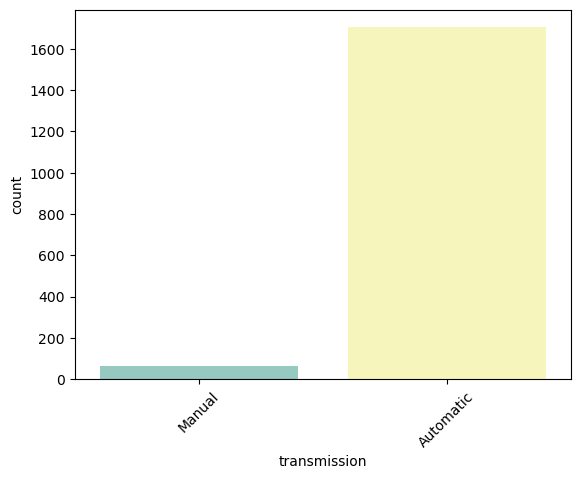

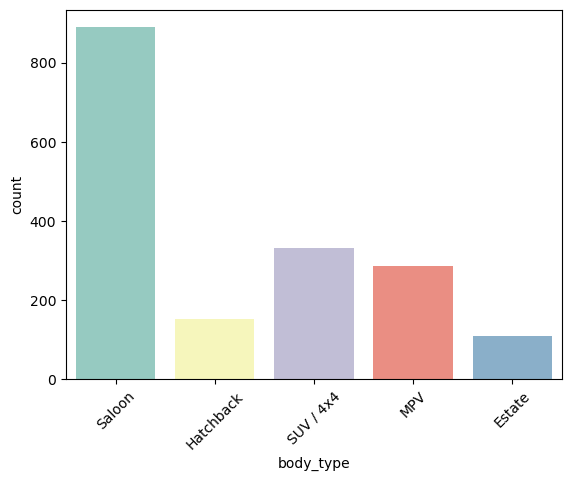

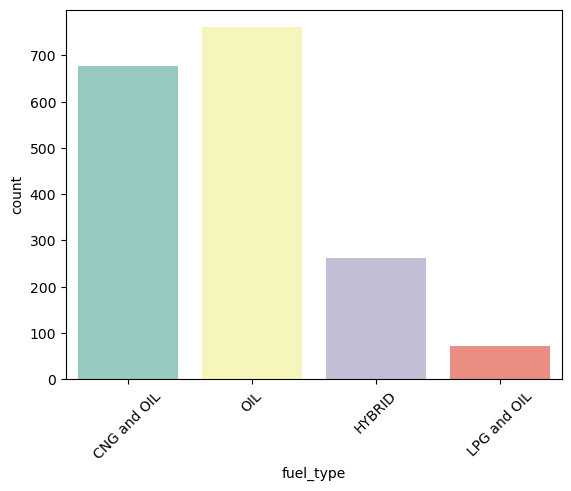

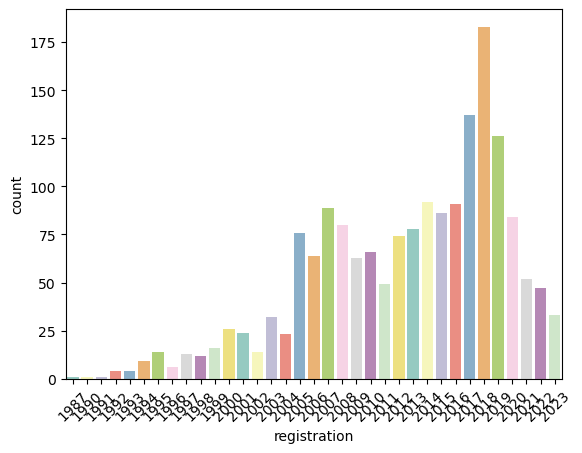

In [28]:
 #Looping through all the features by our y variable - see if there is relationship

features = [ 'transmission','body_type', 'fuel_type','registration']

for f in features:
    sns.countplot(x = f, data = d4, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

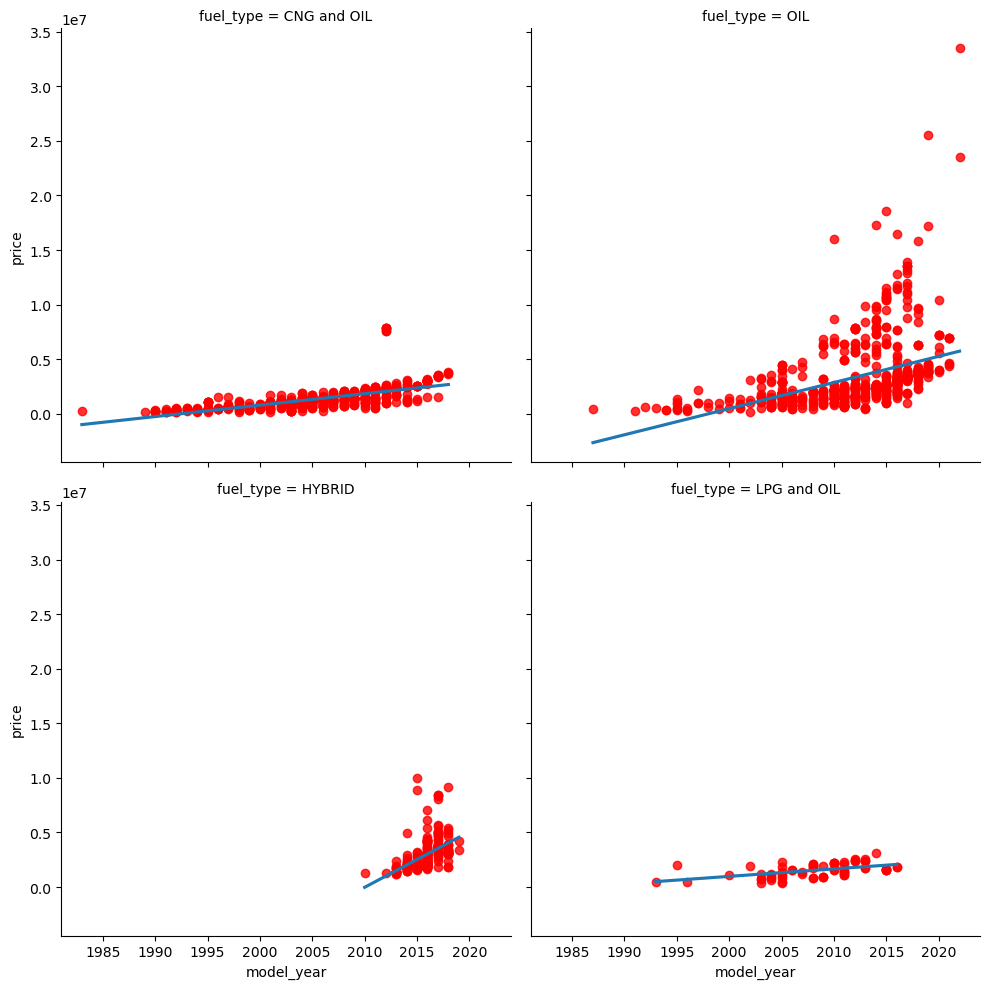

In [29]:
# Visualising a Subset of our data - important featuresz
g = sns.lmplot(x = 'model_year', y = 'price', data = d4, col = 'fuel_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'red'}, ci = False)

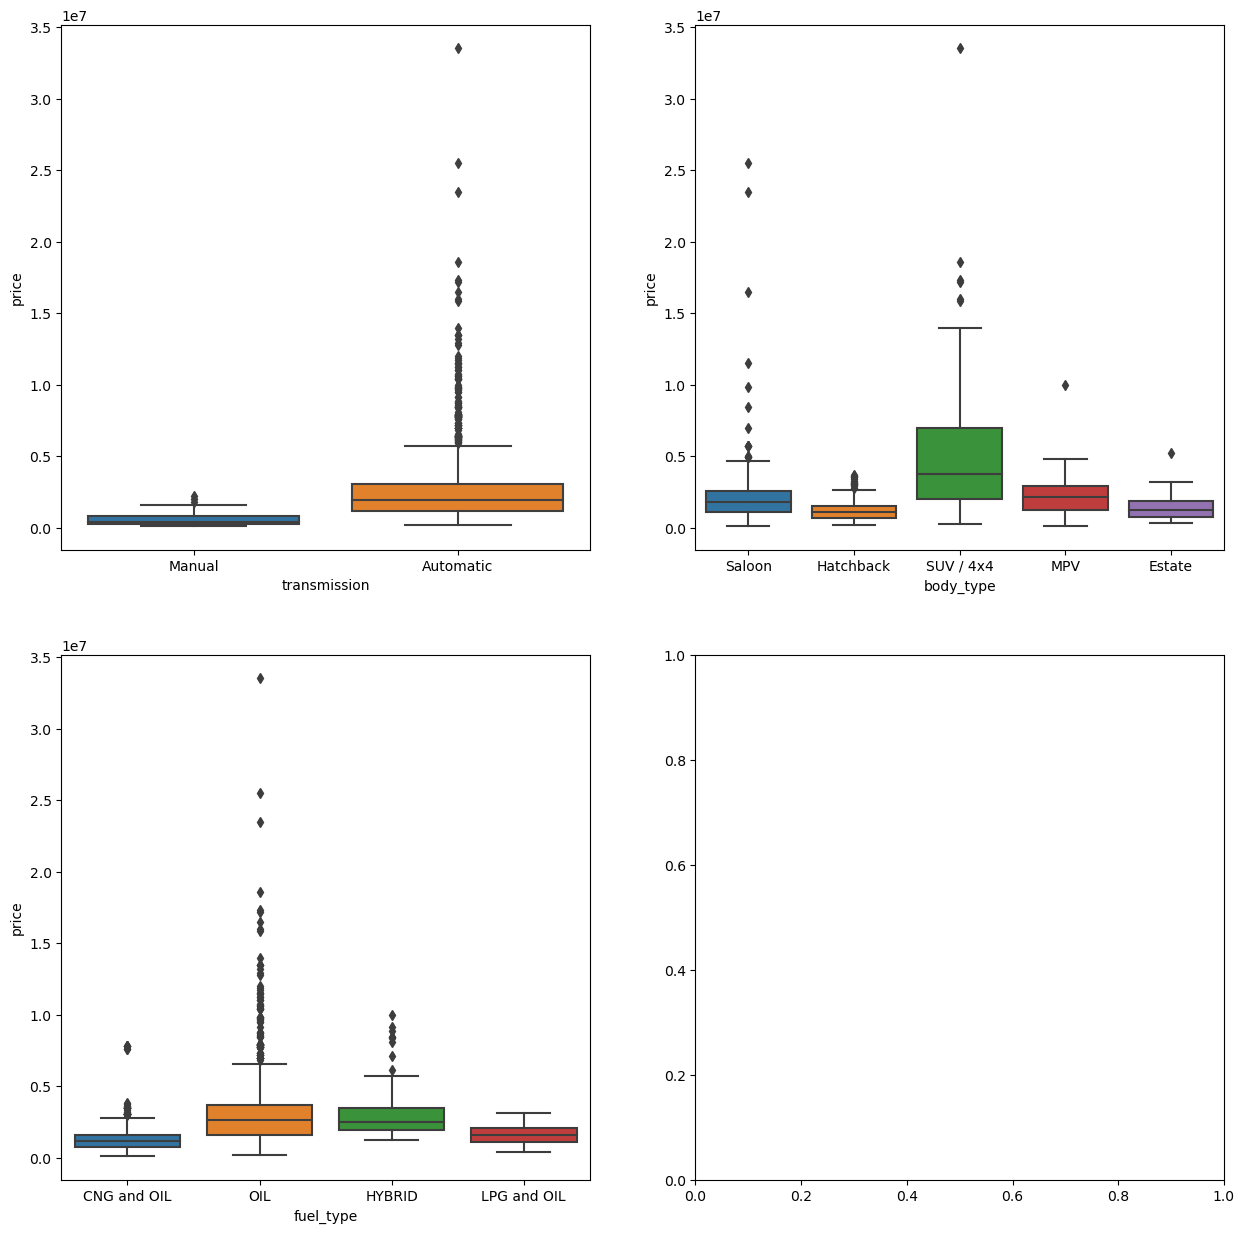

In [30]:
categorical = [ 'transmission','body_type', 'fuel_type']
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = var, y='price', data = d4, ax = subplot)

###### Here we can see that for the transmission automatic cars have the higher average sell price , for body type we can see SUV and MPV have the higher average selling price, in fuel type oil and hybrid system cars have the higher average selling price.

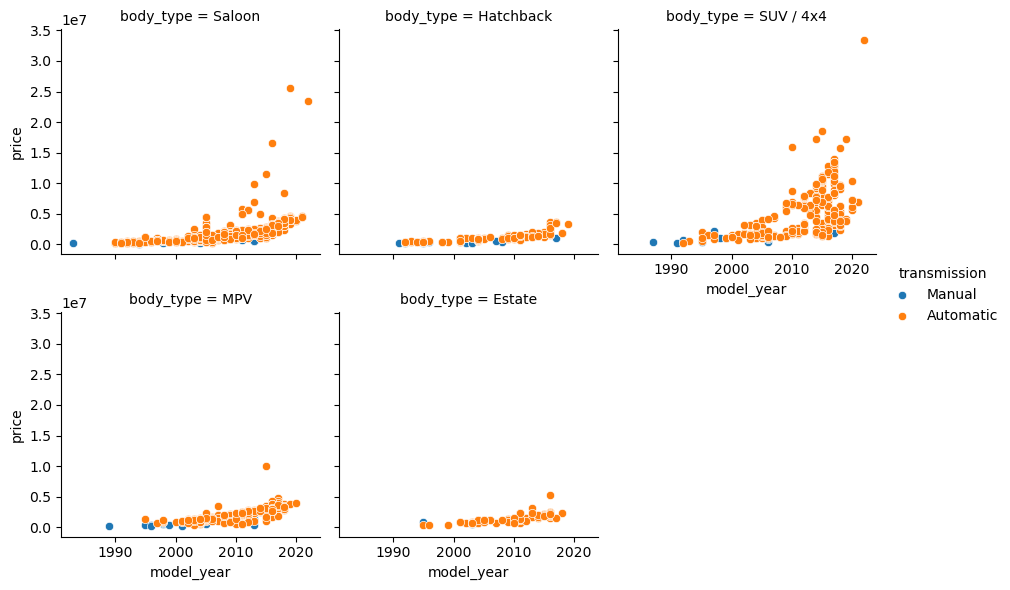

In [31]:
cond_plot = sns.FacetGrid(data=d4, col='body_type', hue = 'transmission', col_wrap=3)
cond_plot.map(sns.scatterplot, 'model_year', 'price');
cond_plot.add_legend()

###### Here in this visualization graph we can see that in each of every body type cars there are two categories of transmission one is automatic and the other one is manual, automatic cars have the high price selling compared to manuals

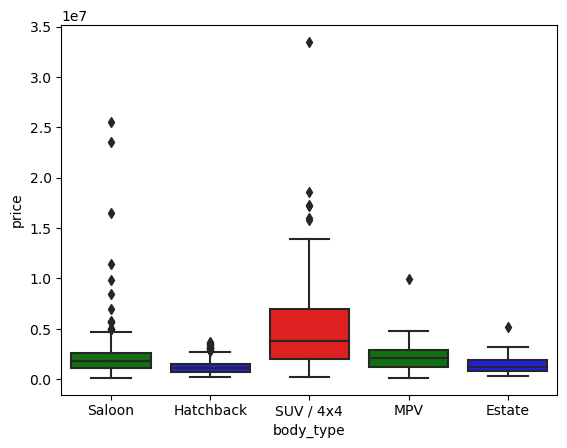

In [32]:
# Investigate the distribution of price by Categorical Variables

pal = ['green', 'blue', 'red']
g = sns.boxplot(x = 'body_type', y = 'price', data = d4, palette = pal)

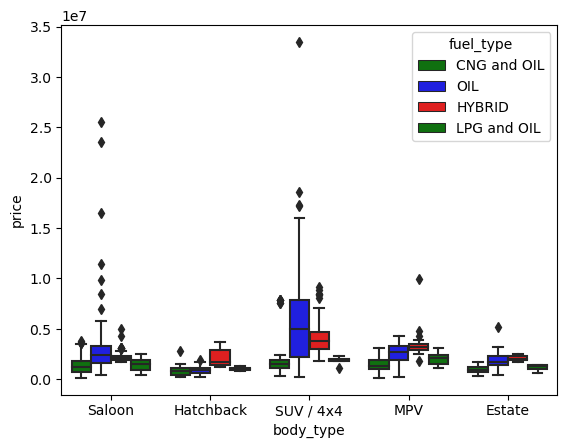

In [33]:
g = sns.boxplot(x = 'body_type', y = 'price', hue = 'fuel_type', data = d4, palette = pal)

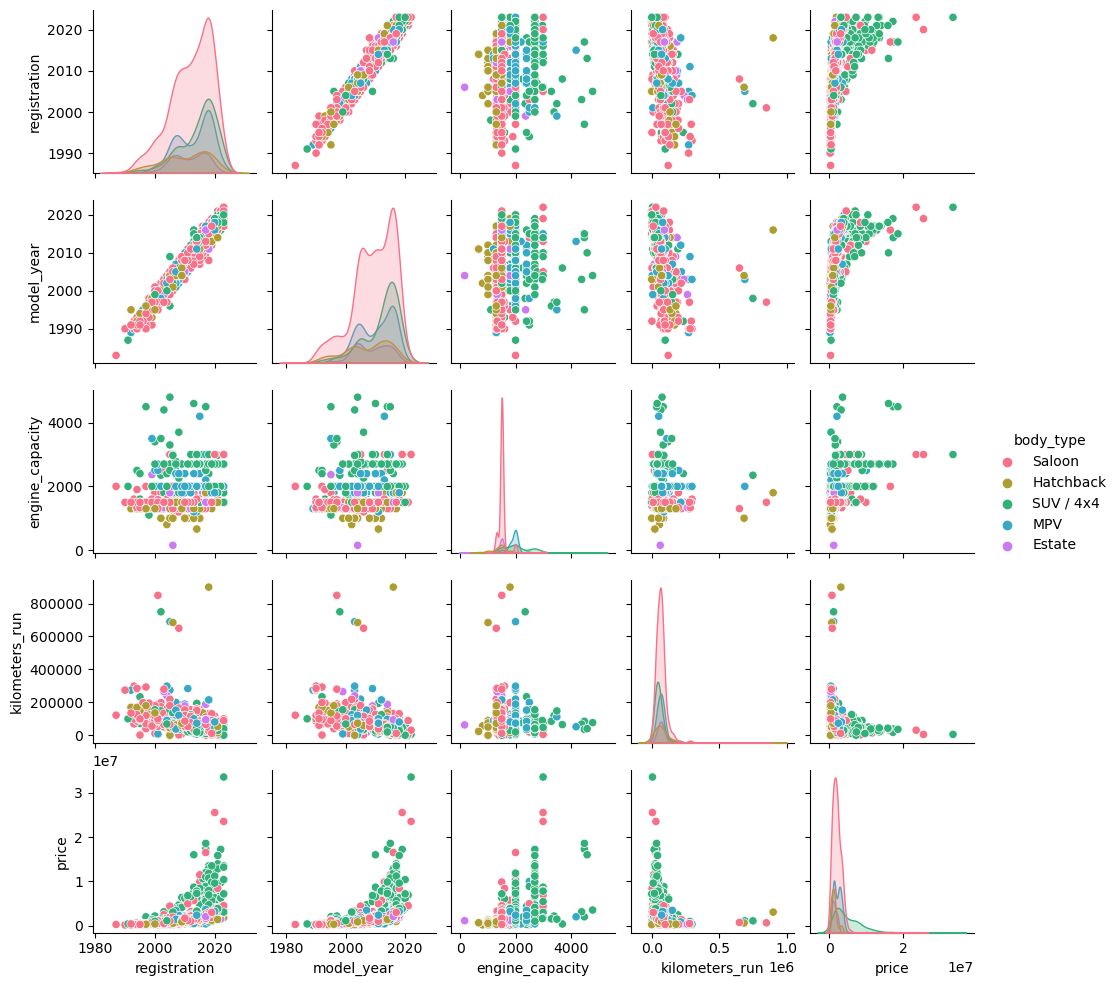

In [34]:
# By Body Type
sns.pairplot(d4,hue = 'body_type',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()

###### Here we can see that saloon cars have the highest price range compared to other body type cars. We can also see that SUV which have updated registration have higher price range then comes the saloon. There are also outliers present. Updated models have high price range.

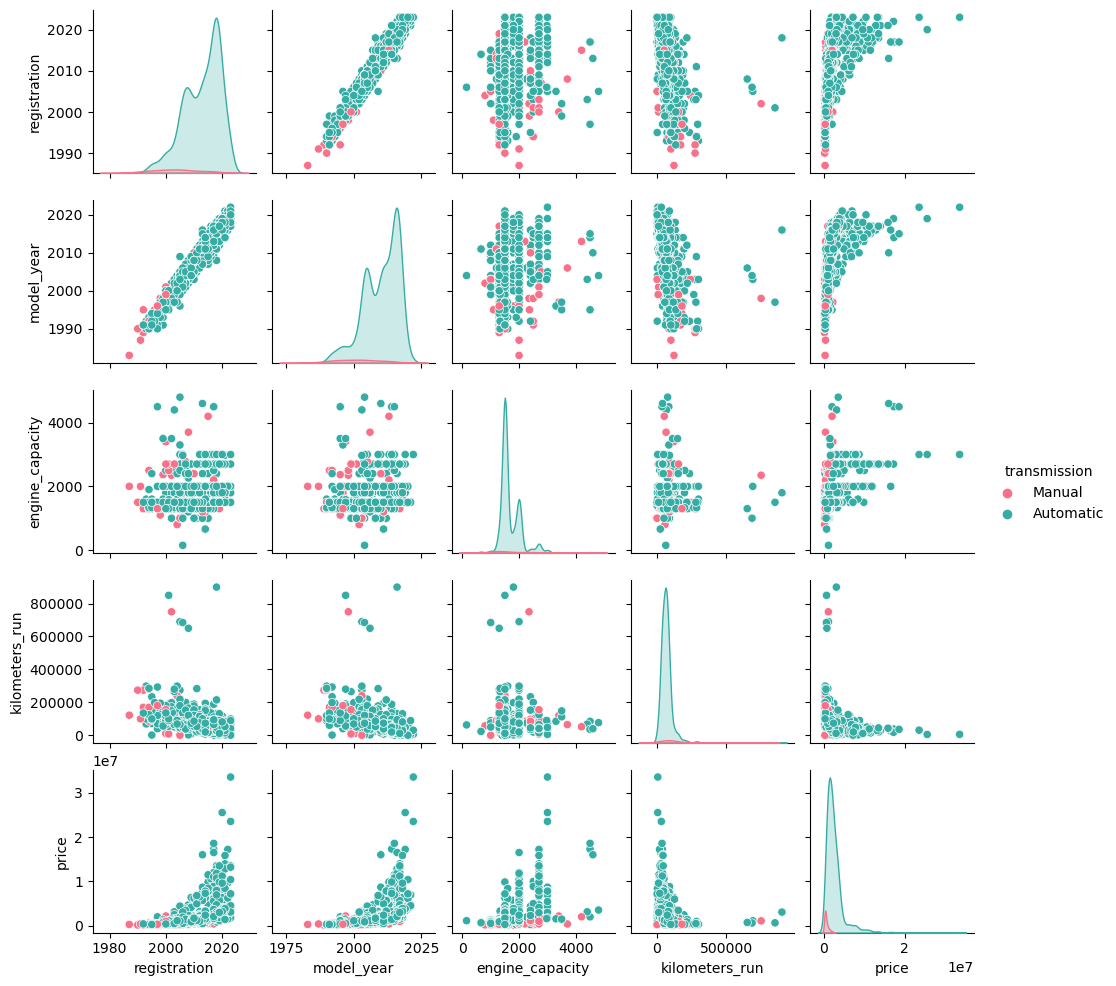

In [35]:
# By Transmission
sns.pairplot(d4,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

## Registration & Selling Price

In [36]:
d4.head()

,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Maruti Suzuki,WagonR,2006,2004,Manual,Saloon,CNG and OIL,1061,73000,249400.0
1,Toyota,Starlet,1995,1992,Automatic,Hatchback,CNG and OIL,1300,135773,406000.0
2,Nissan,Bluebird,2010,2006,Automatic,Saloon,OIL,1500,76000,1180000.0
3,Toyota,RunX,2007,2005,Automatic,Hatchback,CNG and OIL,1500,142000,1038200.0
4,Toyota,Allion,2020,2017,Automatic,Saloon,OIL,1500,20000,3120400.0


In [37]:
year_mean_manual = d4[d4['transmission']=='Manual'].groupby('registration')['price'].mean()
year_mean_automatic = d4[d4['transmission']=='Automatic'].groupby('registration')['price'].mean()

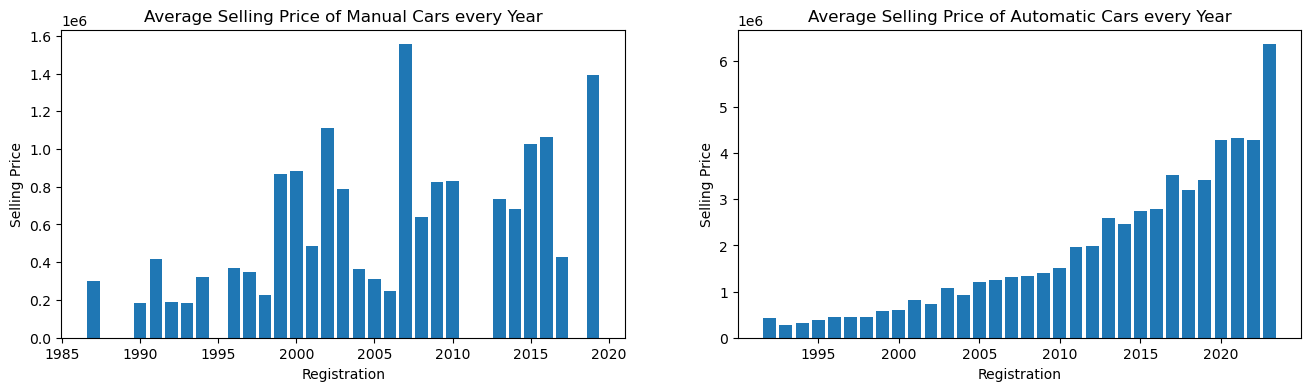

In [38]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Registration')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Registration')
ax[1].set_ylabel('Selling Price')

plt.show()

In [39]:
manual = d4[d4['transmission'] == 'Manual']
automatic = d4[d4['transmission'] == 'Automatic']
hue_order_fuel_type = ['CNG and OIL', 'OIL', 'HYBRID', 'LPG and OIL',]

## Model Year & Kilometers

In [40]:
km_mean = d4.groupby('model_year')['kilometers_run'].mean()

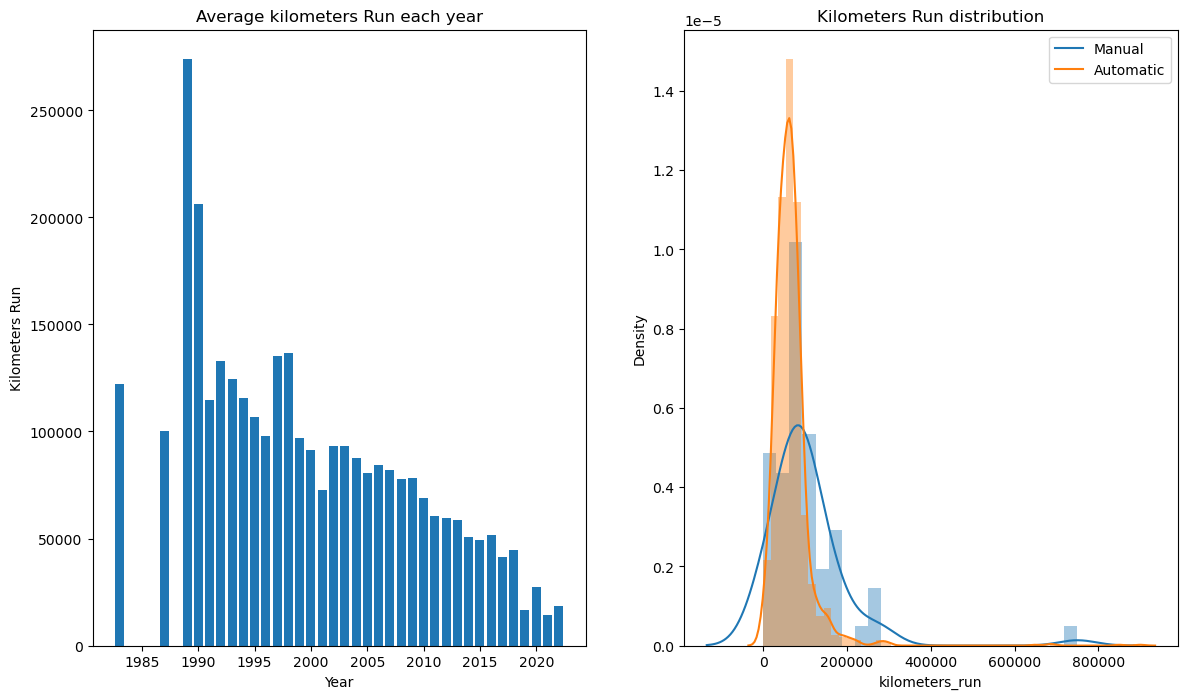

In [41]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['kilometers_run'],ax=ax[1])
sns.distplot(automatic['kilometers_run'],ax=ax[1])

ax[0].set_title('Average kilometers Run each year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Kilometers Run')

ax[1].set_title('Kilometers Run distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

###### Here we can see the old model cars have the highest mileage.

## Model Year & Selling Price

In [42]:
year_mean_manual = d4[d4['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = d4[d4['transmission']=='Automatic'].groupby('model_year')['price'].mean()

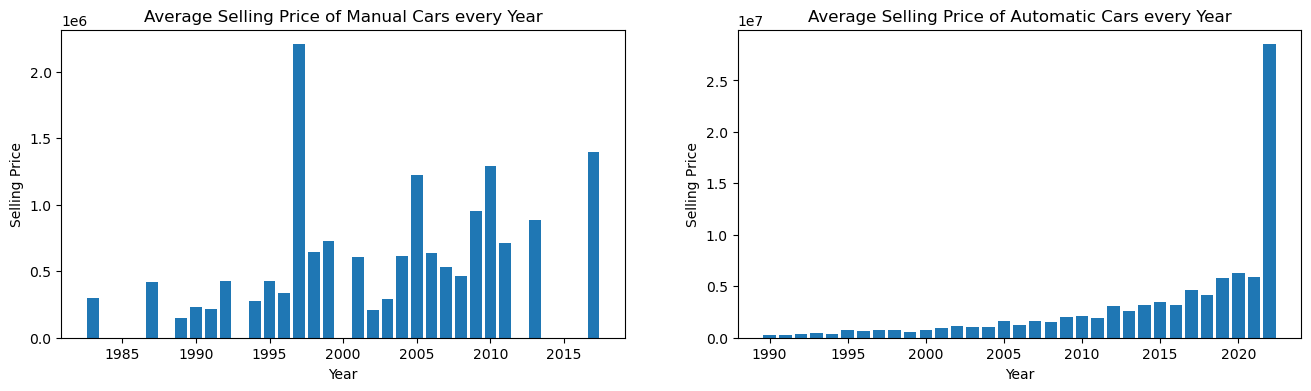

In [43]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

###### We can see that selling price of Automatic cars grows linearly each year whereas manual cars have wavy averages in each year but we can clearly see that selling price grows linearly as well

## Cleaning Data & Removing Outliers

In [44]:
d4 = d4.drop(d4[(d4['price'] > 5500000) & (d4['body_type'] == 'Saloon')].index)
d4 = d4.drop(d4[(d4['price'] > 18000000) & (d4['body_type'] == 'SUV / 4x4')].index)

In [45]:
d4.groupby('transmission').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['model_year'],axis=1)

registration                 engine_capacity                  \
                     mean std   min   max            mean  std  min   max   
transmission                                                                
Automatic            2013   6  1992  2023            1680  386  150  4800   
Manual               2004   8  1987  2019            1718  702  800  4200   

             kilometers_run                         price                   \
                       mean     std  min     max     mean      std     min   
transmission                                                                 
Automatic             67309   52106  217  900000  2438365  2087582  156600   
Manual               104545  103659  200  750000   604116   479009  139200   

                        
                   max  
transmission            
Automatic     17284000  
Manual         2204000

In [46]:
year_mean_manual = d4[d4['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = d4[d4['transmission']=='Automatic'].groupby('model_year')['price'].mean()

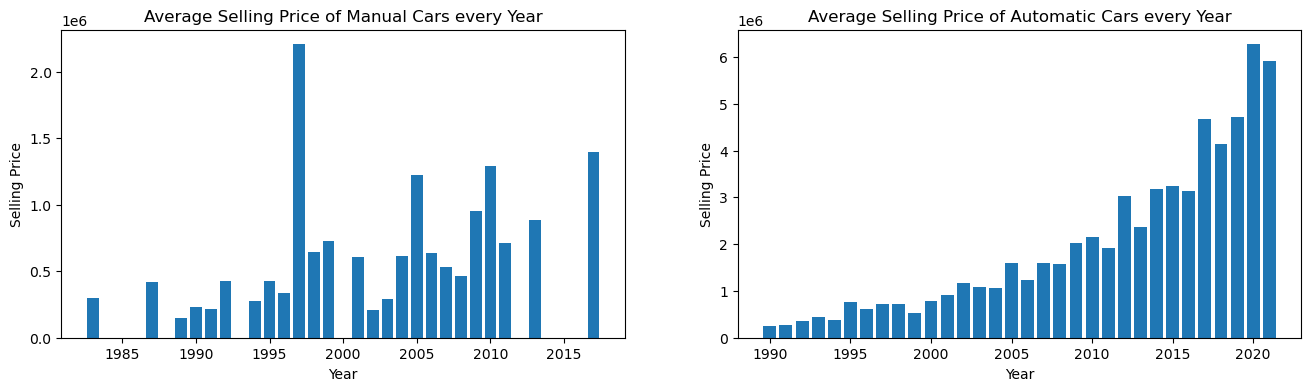

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [48]:
# we can also safely remove the datapoints before 1990 since it produces inconsistency and the data points

d7 = d4[d4['model_year']>1990]

In [49]:
year_mean_manual_price = d7[d7['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic_price = d7[d7['transmission']=='Automatic'].groupby('model_year')['price'].mean()
year_mean_manual_km = d7[d7['transmission']=='Manual'].groupby('model_year')['kilometers_run'].mean()
year_mean_automatic_km = d7[d7['transmission']=='Automatic'].groupby('model_year')['kilometers_run'].mean()

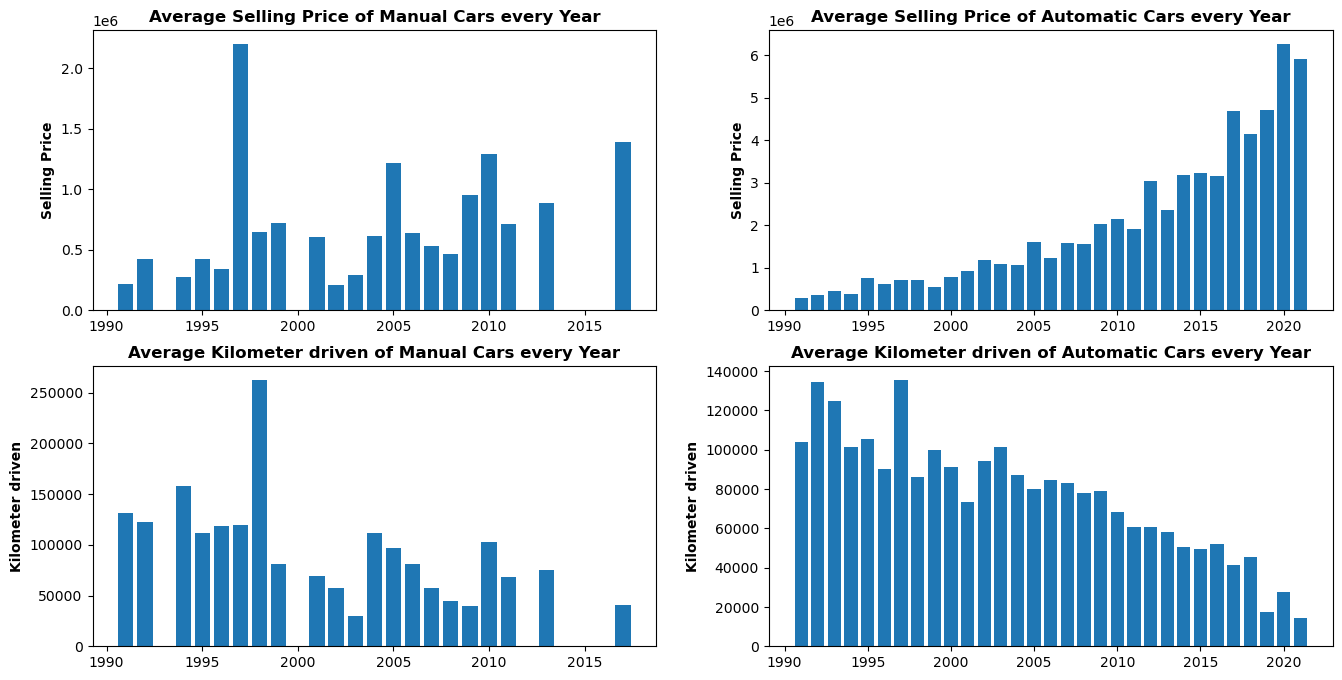

In [50]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year' ,fontweight='bold')
ax[0][0].set_ylabel('Selling Price' ,fontweight='bold')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year' ,fontweight='bold')
ax[0][1].set_ylabel('Selling Price' ,fontweight='bold')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year' ,fontweight='bold')
ax[1][0].set_ylabel('Kilometer driven' ,fontweight='bold')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year' ,fontweight='bold')
ax[1][1].set_ylabel('Kilometer driven' ,fontweight='bold')

plt.show()

###### Outliers are removed!

In [51]:
manual = d7[d7['transmission']=='Manual']
automatic = d7[d7['transmission']=='Automatic']

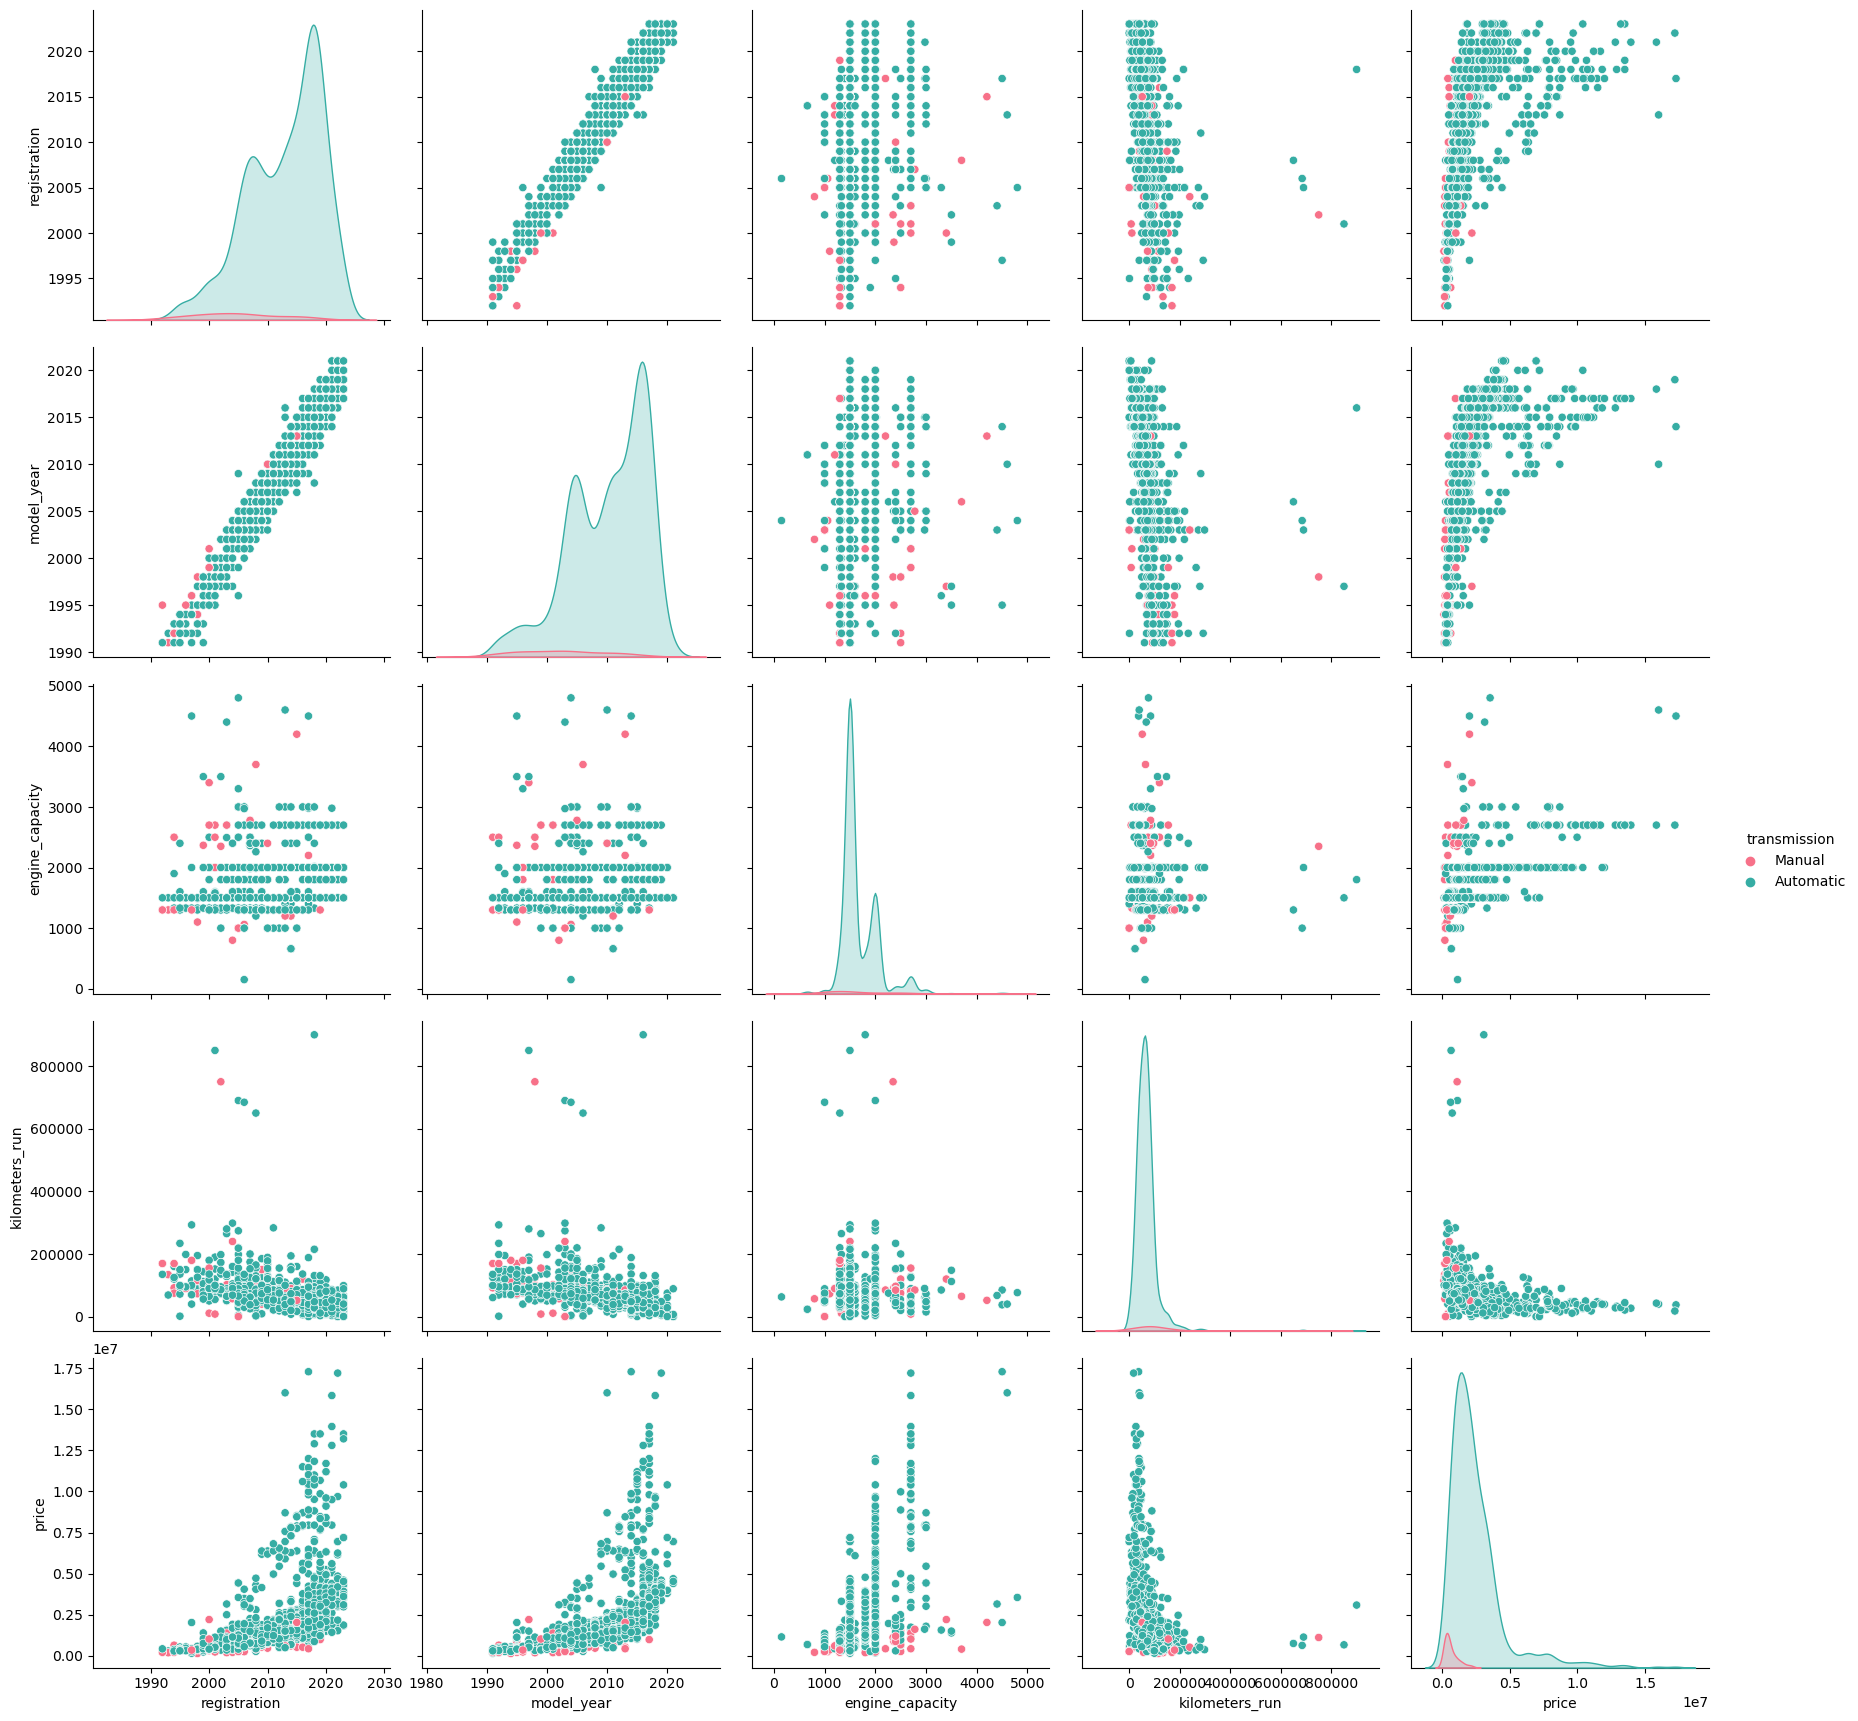

In [52]:
sns.pairplot(d7,hue='transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

###### kilometers run decreases whereas selling price increases over the years. We can also see that automatic cars have higher prices than manual cars. Now it's time to build our model.

In [53]:
d7.head()

,brand,car_model,registration,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Maruti Suzuki,WagonR,2006,2004,Manual,Saloon,CNG and OIL,1061,73000,249400.0
1,Toyota,Starlet,1995,1992,Automatic,Hatchback,CNG and OIL,1300,135773,406000.0
2,Nissan,Bluebird,2010,2006,Automatic,Saloon,OIL,1500,76000,1180000.0
3,Toyota,RunX,2007,2005,Automatic,Hatchback,CNG and OIL,1500,142000,1038200.0
4,Toyota,Allion,2020,2017,Automatic,Saloon,OIL,1500,20000,3120400.0


In [54]:
categorical_columns = ['brand','body_type','car_model']
le = LabelEncoder()

for feat in categorical_columns:
    d7[feat] = le.fit_transform(d7[feat].astype(str))



transmission = pd.get_dummies(d7['transmission'])
fuel = pd.get_dummies(d7['fuel_type'])

X = pd.concat([transmission,fuel,d7.drop(['transmission','fuel_type','price'],axis=1)],axis=1)
y = d7['price']

In [55]:
X.tail(40)

,Automatic,Manual,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,registration,model_year,body_type,engine_capacity,kilometers_run
1758,1,0,0,0,0,1,21,58,2018,2015,3,2000,29356
1759,1,0,0,1,0,0,6,26,2015,2014,3,1500,17000
1760,1,0,0,1,0,0,6,53,2018,2016,4,1500,29704
1761,1,0,1,0,0,0,21,100,2007,2004,1,1500,62300
1762,0,1,0,0,0,1,21,37,2015,2013,2,4200,52000
1763,1,0,0,0,0,1,21,120,2006,2001,1,1000,50000
1764,1,0,1,0,0,0,21,77,2007,2005,2,2000,38000
1765,1,0,0,1,0,0,21,11,2018,2016,4,1500,28000
1766,1,0,1,0,0,0,21,105,2000,1995,1,1300,135773
1767,1,0,0,0,0,1,21,84,2019,2016,4,1500,89000


## Feature Correlation

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1397, 13)
(350, 13)
(1397,)
(350,)


In [57]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,Automatic,Manual,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,registration,model_year,body_type,engine_capacity,kilometers_run
Automatic,1.000000,-1.000000,-0.047480,0.080671,0.019040,-0.020038,-0.006394,-0.041973,0.216880,0.202323,0.095472,-0.026820,-0.092952
Manual,-1.000000,1.000000,0.047480,-0.080671,-0.019040,0.020038,0.006394,0.041973,-0.216880,-0.202323,-0.095472,0.026820,0.092952
CNG and OIL,-0.047480,0.047480,1.000000,-0.333357,-0.160765,-0.672379,0.280906,-0.008268,-0.508063,-0.550226,-0.028193,-0.153738,0.257473
HYBRID,0.080671,-0.080671,-0.333357,1.000000,-0.088204,-0.368900,-0.067134,-0.059961,0.371159,0.375536,-0.151476,-0.034520,-0.119896
LPG and OIL,0.019040,-0.019040,-0.160765,-0.088204,1.000000,-0.177907,0.008518,0.025352,-0.053171,-0.044733,0.054910,-0.018006,0.029825
OIL,-0.020038,0.020038,-0.672379,-0.368900,-0.177907,1.000000,-0.229723,0.041796,0.248041,0.282801,0.116404,0.183155,-0.176704
brand,-0.006394,0.006394,0.280906,-0.067134,0.008518,-0.229723,1.000000,-0.014979,-0.012291,-0.079736,-0.180654,-0.098628,0.102935
car_model,-0.041973,0.041973,-0.008268,-0.059961,0.025352,0.041796,-0.014979,1.000000,-0.000609,0.013957,-0.195725,0.139389,0.091133
registration,0.216880,-0.216880,-0.508063,0.371159,-0.053171,0.248041,-0.012291,-0.000609,1.000000,0.969898,0.037870,0.019697,-0.372691
model_year,0.202323,-0.202323,-0.550226,0.375536,-0.044733,0.282801,-0.079736,0.013957,0.969898,1.000000,0.040384,0.032752,-0.390017


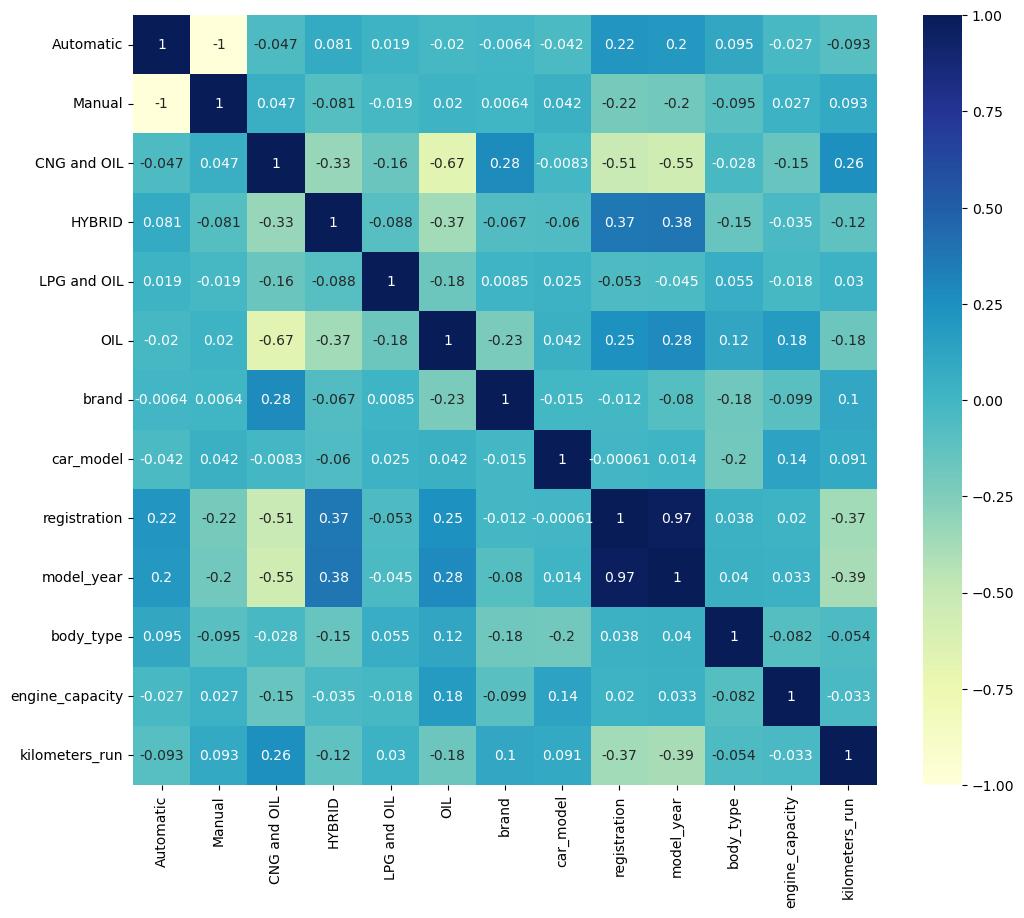

In [58]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "YlGnBu");

In [59]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(X_train, 0.90) 
print(len(corr_features))
print(corr_features)

2
{'model_year', 'Manual'}


In [61]:
# Now dropping the Manual Transmission Column as it is highly correlated with Automatic Column

X = X.drop(columns = 'Manual')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
X.head(5)

,Automatic,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,registration,model_year,body_type,engine_capacity,kilometers_run
0,0,1,0,0,0,11,123,2006,2004,4,1061,73000
1,1,1,0,0,0,21,105,1995,1992,1,1300,135773
2,1,0,0,0,1,15,23,2010,2006,4,1500,76000
3,1,1,0,0,0,21,94,2007,2005,1,1500,142000
4,1,0,0,0,1,21,11,2020,2017,4,1500,20000


## Applying Models

In [63]:
scale_vars = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL','body_type','engine_capacity',
                'kilometers_run'] 
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [64]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6141986360700109

In [65]:
#Using K fold cross validation for Linear Regression:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.61419864, 0.59515437, 0.61702003, 0.61934257, 0.61708629])

## Finding out best model using Grid Search

In [66]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'n_estimators': range(30, 100, 5)
            }
        },
        'XGBoost': {
            'model': XGBRegressor(objective='reg:squarederror'),
            'params': {
                'n_estimators': range(30, 100, 5),
                'max_depth': range(1, 6, 1),
                'eta': [0.1, 0.01],
                'colsample_bytree': np.linspace(0, 1, 10, endpoint=False)
            }
        },
        'knn_regression': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': range(1, 21),
               'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        }
  }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

   #Assuming you have X and y defined
a = find_best_model_using_gridsearchcv(X, y)
a.head()



,model,best_score,best_params
0,linear_regression,0.612560,{'fit_intercept': False}
1,random_forest,0.929864,"{'criterion': 'friedman_mse', 'n_estimators': 30}"
2,XGBoost,0.927453,"{'colsample_bytree': 0.6000000000000001, 'eta'..."
3,knn_regression,0.562890,"{'algorithm': 'brute', 'n_neighbors': 6, 'weig..."


In [67]:
linear_regression_params = a['best_params'][0]
random_forest_best_params = a['best_params'][1]
xg_boost_best_params = a['best_params'][2]
knn_regression_best_params = a['best_params'][3]
print(linear_regression_params)
print(random_forest_best_params)
print(xg_boost_best_params)
print(knn_regression_best_params)

{'fit_intercept': False}
{'criterion': 'friedman_mse', 'n_estimators': 30}
{'colsample_bytree': 0.6000000000000001, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 95}
{'algorithm': 'brute', 'n_neighbors': 6, 'weights': 'distance'}


In [68]:
from sklearn.model_selection import cross_validate, ShuffleSplit
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# Scoring Parameters
scoring = ['r2','neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_median_absolute_error']
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)



# Linear Regression
linear_regression_score = cross_validate(LinearRegression(), X, y, scoring=scoring, cv=cv)

# Random Forest
random_forest_score = cross_validate(RandomForestRegressor(n_estimators = random_forest_best_params['n_estimators'] , criterion = random_forest_best_params['criterion']), X, y, scoring=scoring, cv=cv)

# XGBoost
xgboost_score = cross_validate( XGBRegressor(objective ='reg:squarederror',colsample_bytree = xg_boost_best_params['colsample_bytree'], eta = xg_boost_best_params['eta'], max_depth = xg_boost_best_params['max_depth'], n_estimators = xg_boost_best_params['n_estimators']) , X, y, scoring=scoring, cv=cv)

# K-Nearest Neighbors (KNN) Regression
knn_score = cross_validate(
    KNeighborsRegressor(
        n_neighbors=knn_regression_best_params['n_neighbors'],  
        weights=knn_regression_best_params['weights'], 
        algorithm=knn_regression_best_params['algorithm'], 
    ),
    X, y, scoring=scoring, cv=cv
    
)

In [69]:
def print_score(regressor_type, score):
    print('Regressor Type : '+regressor_type)
    print('The Standard deviation  on the Testing dataset is:    ', stdev(score['test_r2']))
    print('The Mean R2 Score  on the Testing dataset is:    ', score['test_r2'].mean())
    print('The Mean Log of Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_mean_squared_error'].mean()))
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_root_mean_squared_error'].mean()))
    print('The Mean Log of Mean Absolute Error on the Testing dataset is:  ', math.log(-1 * score['test_neg_median_absolute_error'].mean()))
    print('\n\n')

print_score('Linear Regression', linear_regression_score)
print_score('Random Forest', random_forest_score)
print_score('XGBoost', xgboost_score)
print_score('KNN Regression', knn_score)

Regressor Type : Linear Regression
The Standard deviation  on the Testing dataset is:     0.009899791971681329
The Mean R2 Score  on the Testing dataset is:     0.6125603776495417
The Mean Log of Mean Squared Error on the Testing dataset is:  28.184274261940857
The Mean Log of Root Mean Squared Error on the Testing dataset is:  14.08936517209642
The Mean Log of Mean Absolute Error on the Testing dataset is:   13.135993760277033



Regressor Type : Random Forest
The Standard deviation  on the Testing dataset is:     0.023912245572285083
The Mean R2 Score  on the Testing dataset is:     0.9273047734917202
The Mean Log of Mean Squared Error on the Testing dataset is:  26.480467697856277
The Mean Log of Root Mean Squared Error on the Testing dataset is:  13.234038914243822
The Mean Log of Mean Absolute Error on the Testing dataset is:   11.518655351107475



Regressor Type : XGBoost
The Standard deviation  on the Testing dataset is:     0.020039936310694284
The Mean R2 Score  on the Testin

In [70]:
def gen_dictionary(regressor_type,score):
    return {
                'Model': regressor_type, 
                'R2 Score(%)': str(round(100 * score['test_r2'].mean(), 2))  + ' +- ' + str(round(100 * stdev(score['test_r2']), 2)),
                'Log Mean Squared(%)': round( math.log(-1 * score['test_neg_mean_squared_error'].mean()) ,2), 
                'Log Root Mean Squared(%)': round( math.log(-1 * score['test_neg_root_mean_squared_error'].mean()) ,2),
                'Log Mean Absolute(%)' : round( math.log(-1 * score['test_neg_median_absolute_error'].mean()) , 2)
            }



result_dict = []
result_dict.append(gen_dictionary('Linear Regression', linear_regression_score)) 
result_dict.append(gen_dictionary('Random Forest', random_forest_score))
result_dict.append(gen_dictionary('XGBoost', xgboost_score))
result_dict.append(gen_dictionary('KNN Regression', knn_score))

result_df = pd.DataFrame(result_dict) 
result_df.head(5)

,Model,R2 Score(%),Log Mean Squared(%),Log Root Mean Squared(%),Log Mean Absolute(%)
0,Linear Regression,61.26 +- 0.99,28.18,14.09,13.14
1,Random Forest,92.73 +- 2.39,26.48,13.23,11.52
2,XGBoost,92.75 +- 2.0,26.50,13.24,11.83
3,KNN Regression,56.29 +- 6.51,28.30,14.15,12.95


In [71]:
Result = [
            {
                'Model': 'Linear Regression', 
                'R2 Score': 100 * linear_regression_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * linear_regression_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * linear_regression_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * linear_regression_score['test_neg_median_absolute_error'].mean())
            },
         
            {
                'Model': 'Random Forest', 
                'R2 Score': 100 * random_forest_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * random_forest_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * random_forest_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * random_forest_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'XGBoost', 
                'R2 Score': 100 * xgboost_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * xgboost_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * xgboost_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * xgboost_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'KNN Regression', 
                'R2 Score': 100 * knn_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * knn_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * knn_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * knn_score['test_neg_median_absolute_error'].mean())
            },
        ] 
    

    
result_df = pd.DataFrame(Result) 
result_df.head(5)

,Model,R2 Score,Log Mean Squared,Log Root Mean Squared,Log Mean Absolute
0,Linear Regression,61.256038,28.184274,14.089365,13.135994
1,Random Forest,92.730477,26.480468,13.234039,11.518655
2,XGBoost,92.745273,26.497795,13.241008,11.831370
3,KNN Regression,56.288977,28.297579,14.145762,12.953669


<AxesSubplot:xlabel='Model'>

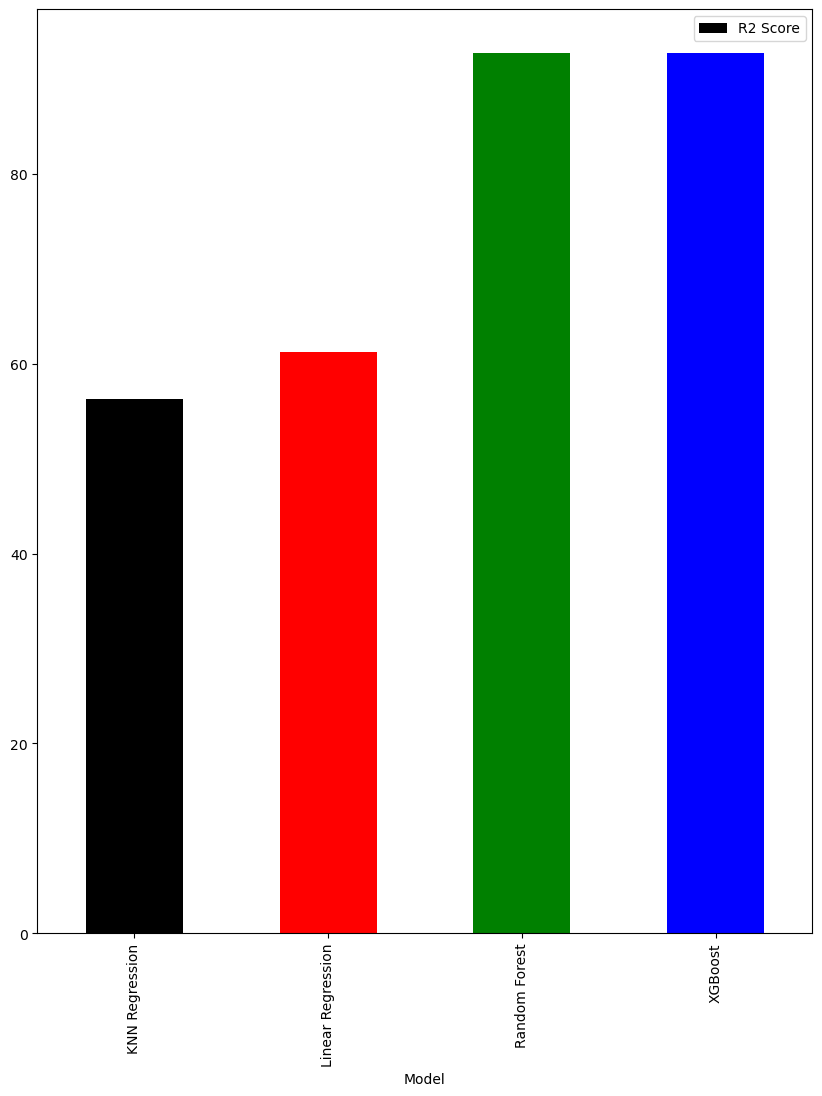

In [72]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y = "R2 Score" , kind="bar",figsize=(10,12) , color=['black', 'red', 'green', 'blue'])


<AxesSubplot:xlabel='Model'>

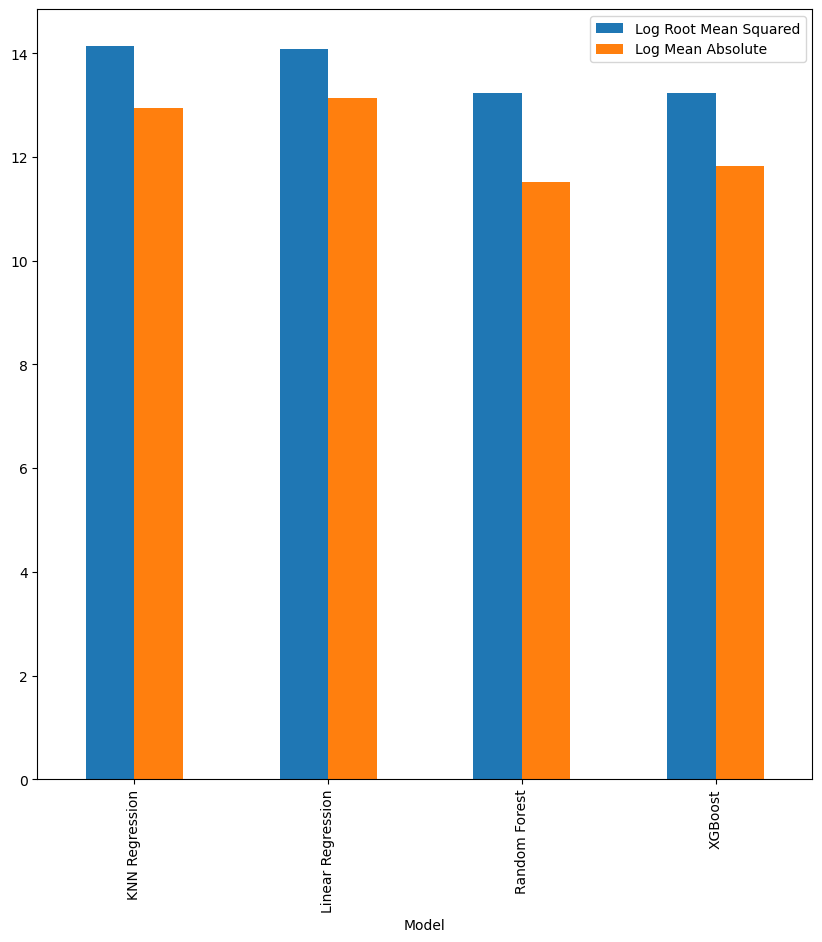

In [73]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y=["Log Root Mean Squared", 'Log Mean Absolute'], kind="bar",figsize=(10,10))

In [74]:
xg_boost_model = XGBRegressor(objective ='reg:squarederror',colsample_bytree = xg_boost_best_params['colsample_bytree'], eta = xg_boost_best_params['eta'], max_depth = xg_boost_best_params['max_depth'], n_estimators = xg_boost_best_params['n_estimators'])

#train model
xg_boost_model.fit(X_train,y_train)
#print score
xg_boost_model.score(X_test,y_test)

0.9199295779927953

## Saving Model

In [75]:
# Saving model and scaler
joblib.dump(xg_boost_model,'xg_boost_model.pkl')

# Saving the scaler
scaler_filename = "min_max_scaler.save"
joblib.dump(scaler, scaler_filename) 

['min_max_scaler.save']

In [76]:
X_train.head()
X_train.columns

Index(['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'brand',
       'car_model', 'registration', 'model_year', 'body_type',
       'engine_capacity', 'kilometers_run'],
      dtype='object')

In [77]:
def get_price(transmission ,fuel_type,  brand, car_model, registration, model_year, body_type, engine_capacity, kilometers_run):
    brand_dict = {'Chevrolet': 0, 'Ford': 1, 'Ford': 2, 'Honda': 3, 'Hyundai': 4, 'Kia': 5, 'Mahindra': 6, 'Maruti Suzuki': 7, 'Mazda': 8, 'Mitsubishi': 9, 'Nissan': 10, 'Proton': 11, 'SsangYong': 12, 'Suzuki': 13, 'Tata': 14, 'Toyota': 15, 'BMW':16}
    body_type_dict = {'Estate': 0, 'Hatchback': 1, 'MPV': 2, 'SUV / 4x4': 3, 'Saloon': 4}
    car_model_dict = {'320i': 0, '5 Series': 1, 'APV': 2, 'Accent': 3, 'Allion': 4, 'Alphard': 5, 'Alto': 6, 'Alto 800': 7, 'Aqua': 8, 'Attrage': 9, 'Auris': 10, 'Avanza': 11, 'Axela': 12, 'Axio': 13, 'Bluebird': 14, 'C-Class': 15, 'C-HR': 16, 'CR-V': 17, 'CR-Z': 18, 'CX-7': 19, 'Cami': 20, 'Camry': 21, 'Carina': 22, 'Carryboy': 23, 'Cefiro': 24, 'City': 25, 'CityRover': 26, 'Civic': 27, 'Coaster': 28, 'Corolla': 29, 'Corona': 30, 'Corsa': 31, 'Crown': 32, 'Discovery': 33, 'Dualis': 34, 'Dyna': 35, 'E 250': 36, 'Eco Sport': 37, 'Esquire': 38, 'Estima': 39, 'Fielder': 40, 'Fiesta': 41, 'Fit': 42, 'GLA-Class': 43, 'GLX': 44, 'Grace': 45, 'H-RV': 46, 'H1': 47, 'H2': 48, 'HR-V': 49, 'Harrier': 50, 'Hiace': 51, 'Hilux': 52, 'Ikon': 53, 'Indigo Ecs': 54, 'Insight': 55, 'Juke': 56, 'Kluger': 57, 'Kyron': 58, 'Lancer': 59, 'Land Cruiser': 60, 'LiteAce': 61, 'MPV': 62, 'MR2': 63, 'Mark II': 64, 'Murano': 65, 'NX': 66, 'Noah': 67, 'Note': 68, 'Other Model': 69, 'Outlandar': 70, 'Outlander': 71, 'Pajero': 72, 'Passo': 73, 'Pathfinder': 74, 'Prado': 75, 'Premio': 76, 'Prius': 77, 'Probox': 78, 'Q5': 79, 'RAV4': 80, 'RVR': 81, 'RX': 82, 'RX-8': 83, 'Ractis': 84, 'Raum': 85, 'RunX': 86, 'Rush': 87, 'S660': 88, 'Santa Fe': 89, 'Satria': 90, 'Sienta': 91, 'Sonata': 92, 'Spacio': 93, 'Spark': 94, 'Sportage': 95, 'Sprinter': 96, 'Starlet': 97, 'Starlet Soleil': 98, 'Succeed': 99, 'Sunny': 100, 'Swift': 101, 'Terrano': 102, 'Tiida': 103, 'TownAce': 104, 'Tucson': 105, 'Urvan': 106, 'V6': 107, 'Vezel': 108, 'Vista': 109, 'Vitz': 110, 'WagonR': 111, 'Wish': 112, 'X Assista': 113, 'X-Trail': 114, 'XJ': 115, 'Yaris': 116, 'ist': 117, 'l200': 118, 'l300': 119, 'Belta':120}
    features = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'brand', 'car_model' ,'registration','model_year', 'body_type', 'engine_capacity', 'kilometers_run']
    scale_vars = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL','body_type','engine_capacity',
                'kilometers_run']

    # deciding fuel type
    cng_and_oil = 0
    hybrid = 0
    lpg_and_oil = 0
    oil = 0
    if fuel_type == 'CNG and OIL':
        cng_and_oil = 1
    elif fuel_type == 'HYBRID':
        hybrid = 1
    elif fuel_type == 'LPG and OIL':
        lpg_and_oil = 1
    elif fuel_type == 'OIL':
        oil = 1


    # deciding transmission type
    if transmission == '1':
        automatic = 1
    else:
        automatic = 0


    test_array = [ automatic , cng_and_oil , hybrid, lpg_and_oil, oil, brand_dict[brand], car_model_dict[car_model], registration, model_year, body_type_dict[body_type], engine_capacity, kilometers_run]
    test_array = np.array(test_array) # convert into numpy array
    
    test_array = test_array.reshape(1,-1) #reshape
    test_df = pd.DataFrame(test_array, columns = features)
 
    # scaling data
    scaler_filename = "min_max_scaler.save"
    scaler = joblib.load(scaler_filename)
    scaler.clip = False
    test_df[scale_vars] = scaler.transform(test_df[scale_vars])
    
    
    #declare path where you saved your model
    model_path = 'xg_boost_model.pkl'
    #open file
    file = open(model_path, "rb")
    #load the trained model
    trained_model = joblib.load(file)


    prediction = int(trained_model.predict(test_df))
    return prediction

In [81]:
price = get_price('1','CNG and OIL','Toyota','Allion',2016 ,2019 ,'Saloon',1500 , 66000)
print(price)

2522537


In [79]:
import sklearn
print(sklearn.__version__)

1.3.1
